<a href="https://colab.research.google.com/github/N8uce/Predicting-the-timing-of-pregnancy/blob/main/%D0%92%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ВКР на тему: "Прогнозирорование сроков беременности"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Предварительная обработка

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel("/content/drive/MyDrive/ДАТАСЕТЫ/Пренатальная диагнос.xlsx")
df

,vozrast,gr-dni,ctr,nt,rost,ves,"pol(1-м, 0-д)"
0,18,70,61,1.3,48,3100,0
1,22,72,50,0.9,50,3400,0
2,29,73,45,0.9,53,3500,1
3,28,74,47,1.1,50,3490,1
4,31,74,46,1.3,53,3590,0
...,...,...,...,...,...,...,...
1045,27,105,83,1.4,56,4650,1
1046,30,105,80,0.9,51,3500,1
1047,21,107,84,1.9,52,3370,0
1048,18,107,82,1.7,48,3110,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vozrast        1050 non-null   int64  
 1   gr-dni         1050 non-null   int64  
 2   ctr            1050 non-null   int64  
 3   nt             1050 non-null   float64
 4   rost           1050 non-null   int64  
 5   ves            1050 non-null   int64  
 6   pol(1-м, 0-д)  1050 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 57.5 KB


В датасете отсутствуют пустые значения, предварительная обработка не требуется

# Первичная обработка выборки

In [ ]:
df.describe()

,vozrast,gr-dni,ctr,nt,rost,ves,"pol(1-м, 0-д)"
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,28.681905,88.764762,64.125714,1.337333,51.698095,3435.779048,0.549524
std,5.406432,6.314969,10.449999,0.397701,2.087069,399.315445,0.497778
min,16.000000,70.000000,45.000000,0.300000,45.000000,2410.000000,0.000000
25%,25.000000,84.000000,56.000000,1.100000,50.000000,3150.000000,0.000000
50%,28.000000,88.000000,64.000000,1.300000,52.000000,3430.000000,1.000000
75%,33.000000,93.000000,72.000000,1.600000,53.000000,3700.000000,1.000000
max,45.000000,108.000000,85.000000,2.800000,60.000000,5040.000000,1.000000


In [ ]:
bins = [0, 20, 30, 40, 50]
labels = ['0-20', '21-30', '31-40', '41-50']
df['age_group'] = pd.cut(df['vozrast'], bins=bins, labels=labels, right=False)
df.groupby('age_group')['vozrast'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
0-20,29.0,18.206897,0.940338,16.0,18.0,18.0,19.0,19.0
21-30,577.0,25.109185,2.368090,20.0,23.0,25.0,27.0,29.0
31-40,418.0,33.574163,2.622628,30.0,31.0,33.0,36.0,39.0
41-50,26.0,41.000000,1.296148,40.0,40.0,40.5,42.0,45.0


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ДАТАСЕТЫ/Пренатальная диагнос.xlsx")

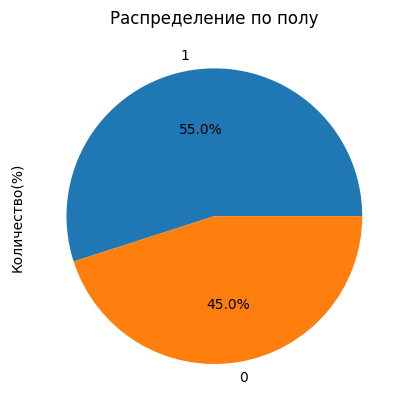

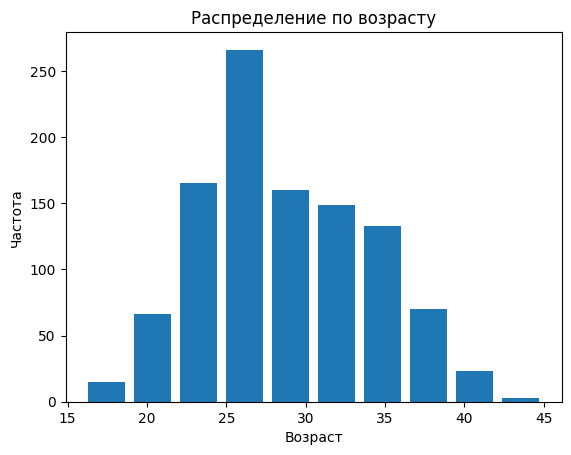

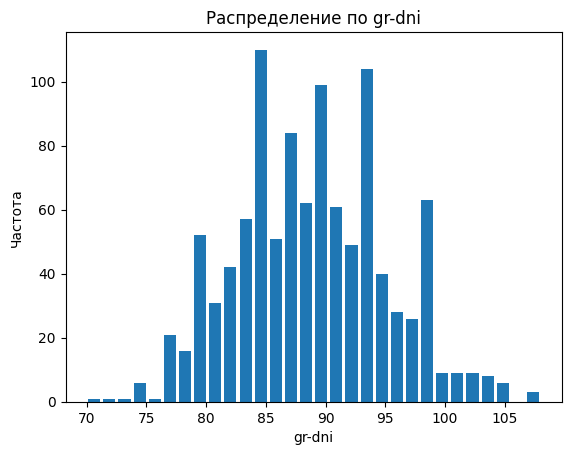

In [ ]:
import matplotlib.pyplot as plt

#Круговая диаграмма
df['pol(1-м, 0-д)'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Распределение по полу')
plt.ylabel('Количество(%)')
plt.show()

#Гистограммы
df['vozrast'].plot(kind='hist', rwidth=0.8)
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

df['gr-dni'].plot(kind='hist', rwidth=0.8, bins=30)
plt.title('Распределение по gr-dni')
plt.xlabel('gr-dni')
plt.ylabel('Частота')
plt.show()


# Корреляционный анализ

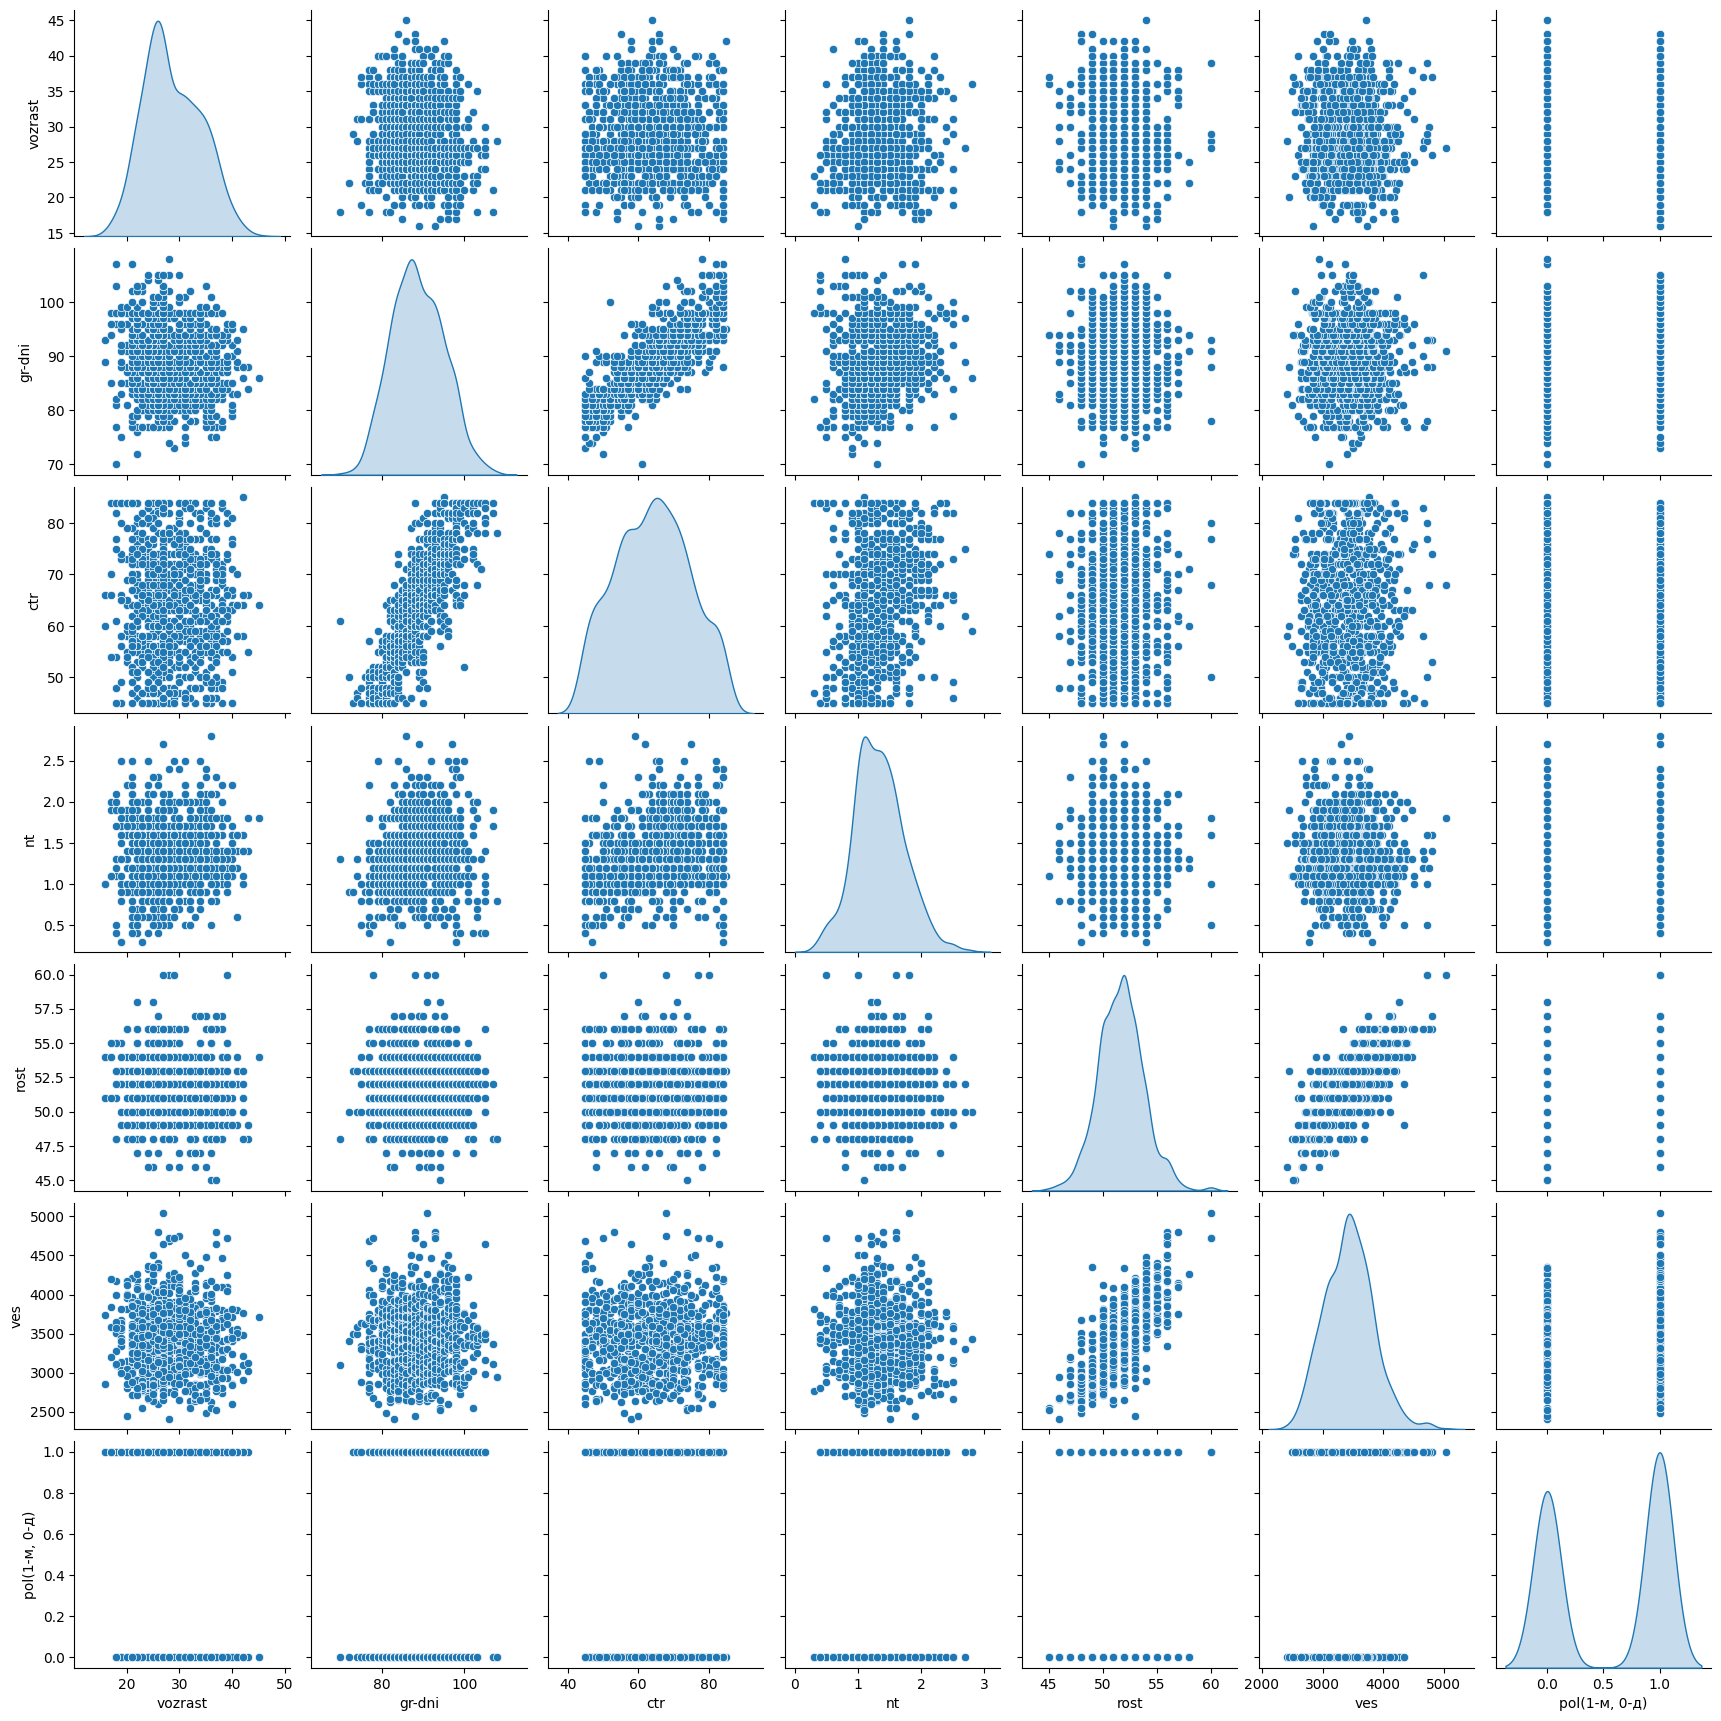

In [ ]:
import seaborn as sns
sns.pairplot(df,diag_kind="kde")

In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Проверка на нормальность через тест Шапиро-Уилка
for column in df.columns:
    _, p_value = shapiro(df[column])
    if p_value < 0.05:
        print(f"Данные в столбце {column} не распределены нормально (p-значение: {p_value})")
    else:
        print(f"Данные в столбце {column} распределены нормально (p-значение: {p_value})")


Данные в столбце vozrast не распределены нормально (p-значение: 1.4716973473216655e-10)
Данные в столбце gr-dni не распределены нормально (p-значение: 4.650677874451503e-05)
Данные в столбце ctr не распределены нормально (p-значение: 1.0043033245310529e-11)
Данные в столбце nt не распределены нормально (p-значение: 1.500143298471812e-08)
Данные в столбце rost не распределены нормально (p-значение: 3.702535240207583e-13)
Данные в столбце ves не распределены нормально (p-значение: 4.891722710453905e-06)
Данные в столбце pol(1-м, 0-д) не распределены нормально (p-значение: 1.531619221507025e-42)


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# Проверка на нормальность через критерий пирсона
for column in df.columns:
    _, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"Данные в столбце {column} не распределены нормально (p-значение: {p_value})")
    else:
        print(f"Данные в столбце {column} распределены нормально (p-значение: {p_value})")

Данные в столбце vozrast не распределены нормально (p-значение: 1.2158333152896473e-10)
Данные в столбце gr-dni не распределены нормально (p-значение: 0.002141619403100637)
Данные в столбце ctr не распределены нормально (p-значение: 4.906482837724276e-21)
Данные в столбце nt не распределены нормально (p-значение: 1.942395906154577e-05)
Данные в столбце rost не распределены нормально (p-значение: 2.875790211374307e-06)
Данные в столбце ves не распределены нормально (p-значение: 1.023582887483391e-05)
Данные в столбце pol(1-м, 0-д) не распределены нормально (p-значение: 0.0)


Пирсон (!)

In [ ]:
corr_matrix = df.corr(method='pearson')
print(corr_matrix)

                vozrast    gr-dni       ctr        nt      rost       ves  \
vozrast        1.000000 -0.116840 -0.011525  0.058111 -0.032175 -0.017540   
gr-dni        -0.116840  1.000000  0.825382  0.230409  0.004516 -0.007043   
ctr           -0.011525  0.825382  1.000000  0.281578  0.019094  0.031302   
nt             0.058111  0.230409  0.281578  1.000000 -0.029017 -0.036715   
rost          -0.032175  0.004516  0.019094 -0.029017  1.000000  0.733990   
ves           -0.017540 -0.007043  0.031302 -0.036715  0.733990  1.000000   
pol(1-м, 0-д) -0.009727 -0.022826 -0.024289  0.034472  0.160762  0.170675   

               pol(1-м, 0-д)  
vozrast            -0.009727  
gr-dni             -0.022826  
ctr                -0.024289  
nt                  0.034472  
rost                0.160762  
ves                 0.170675  
pol(1-м, 0-д)       1.000000  


In [ ]:
from scipy.stats import pearsonr
#определение значимости для пирсона
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr, p_value = pearsonr(df[df.columns[i]], df[df.columns[j]])
        if p_value < 0.05:
            print(f"Корреляция между {df.columns[i]} и {df.columns[j]} значима (коэффициент корреляции: {corr}, p-значение: {p_value})")
        else:
            print(f"Корреляция между {df.columns[i]} и {df.columns[j]} не значима (коэффициент корреляции: {corr}, p-значение: {p_value})")


Корреляция между vozrast и gr-dni значима (коэффициент корреляции: -0.11684047351160068, p-значение: 0.00014790677205767647)
Корреляция между vozrast и ctr не значима (коэффициент корреляции: -0.011524589232453189, p-значение: 0.7091432751968021)
Корреляция между vozrast и nt не значима (коэффициент корреляции: 0.05811091917289282, p-значение: 0.05978757289685729)
Корреляция между vozrast и rost не значима (коэффициент корреляции: -0.032174739833152034, p-значение: 0.29759320007014667)
Корреляция между vozrast и ves не значима (коэффициент корреляции: -0.017539876631346697, p-значение: 0.5702226318739609)
Корреляция между vozrast и pol(1-м, 0-д) не значима (коэффициент корреляции: -0.009726646442309474, p-значение: 0.7529048595498842)
Корреляция между gr-dni и ctr значима (коэффициент корреляции: 0.8253817378912057, p-значение: 1.901646579464101e-262)
Корреляция между gr-dni и nt значима (коэффициент корреляции: 0.23040938005057157, p-значение: 4.0568839946684575e-14)
Корреляция между 

Спирмен (*)

In [ ]:
corr_matrix = df.corr(method='spearman')
print(corr_matrix)

                vozrast    gr-dni       ctr        nt      rost       ves  \
vozrast        1.000000 -0.113490 -0.006088  0.049059 -0.035163 -0.014998   
gr-dni        -0.113490  1.000000  0.835232  0.260480  0.008862 -0.013994   
ctr           -0.006088  0.835232  1.000000  0.320974  0.017523  0.024061   
nt             0.049059  0.260480  0.320974  1.000000 -0.029036 -0.040560   
rost          -0.035163  0.008862  0.017523 -0.029036  1.000000  0.697909   
ves           -0.014998 -0.013994  0.024061 -0.040560  0.697909  1.000000   
pol(1-м, 0-д) -0.000164 -0.026748 -0.027402  0.042171  0.174085  0.167658   

               pol(1-м, 0-д)  
vozrast            -0.000164  
gr-dni             -0.026748  
ctr                -0.027402  
nt                  0.042171  
rost                0.174085  
ves                 0.167658  
pol(1-м, 0-д)       1.000000  


In [ ]:
from scipy.stats import spearmanr
# Вычисление коэффициентов корреляции Спирмена и p-значений для всех пар переменных
spearman_corr, p_values = spearmanr(df)

# Вывод значений
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if p_values[i, j] < 0.05:
            print(f"Корреляция между {df.columns[i]} и {df.columns[j]} значима (коэффициент корреляции Спирмена: {spearman_corr[i, j]}, p-значение: {p_values[i, j]})")
        else:
            print(f"Корреляция между {df.columns[i]} и {df.columns[j]} не значима (коэффициент корреляции Спирмена: {spearman_corr[i, j]}, p-значение: {p_values[i, j]})")


Корреляция между vozrast и gr-dni значима (коэффициент корреляции Спирмена: -0.11349010649340739, p-значение: 0.0002286747866067759)
Корреляция между vozrast и ctr не значима (коэффициент корреляции Спирмена: -0.006087786886339625, p-значение: 0.8438011684603332)
Корреляция между vozrast и nt не значима (коэффициент корреляции Спирмена: 0.04905897253926179, p-значение: 0.11211558836138025)
Корреляция между vozrast и rost не значима (коэффициент корреляции Спирмена: -0.03516336866659164, p-значение: 0.25494588540024554)
Корреляция между vozrast и ves не значима (коэффициент корреляции Спирмена: -0.01499824476595133, p-значение: 0.6273592335457298)
Корреляция между vozrast и pol(1-м, 0-д) не значима (коэффициент корреляции Спирмена: -0.0001644713027634613, p-значение: 0.9957527758044977)
Корреляция между gr-dni и ctr значима (коэффициент корреляции Спирмена: 0.8352318146617658, p-значение: 1.9291082520277784e-274)
Корреляция между gr-dni и nt значима (коэффициент корреляции Спирмена: 0.2

Кендалл

In [ ]:
corr_matrix = df.corr(method='kendall')
print(corr_matrix)

                vozrast    gr-dni       ctr        nt      rost       ves  \
vozrast        1.000000 -0.078437 -0.004011  0.035148 -0.026064 -0.009871   
gr-dni        -0.078437  1.000000  0.666827  0.191603  0.006457 -0.009296   
ctr           -0.004011  0.666827  1.000000  0.234764  0.012723  0.016212   
nt             0.035148  0.191603  0.234764  1.000000 -0.020963 -0.026815   
rost          -0.026064  0.006457  0.012723 -0.020963  1.000000  0.552996   
ves           -0.009871 -0.009296  0.016212 -0.026815  0.552996  1.000000   
pol(1-м, 0-д) -0.000138 -0.022330 -0.022699  0.035688  0.151675  0.137561   

               pol(1-м, 0-д)  
vozrast            -0.000138  
gr-dni             -0.022330  
ctr                -0.022699  
nt                  0.035688  
rost                0.151675  
ves                 0.137561  
pol(1-м, 0-д)       1.000000  


In [ ]:
from scipy.stats import kendalltau

for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr, p_value = kendalltau(df[df.columns[i]], df[df.columns[j]])
        if p_value < 0.05:
            print(f"Корреляция между {df.columns[i]} и {df.columns[j]} значима (коэффициент корреляции Кендалла: {corr}, p-значение: {p_value})")
        else:
            print(f"Корреляция между {df.columns[i]} и {df.columns[j]} не значима (коэффициент корреляции Кендалла: {corr}, p-значение: {p_value})")


Корреляция между vozrast и gr-dni значима (коэффициент корреляции Кендалла: -0.07843659862223377, p-значение: 0.00028224313397000176)
Корреляция между vozrast и ctr не значима (коэффициент корреляции Кендалла: -0.004011049369051467, p-значение: 0.8515651120912097)
Корреляция между vozrast и nt не значима (коэффициент корреляции Кендалла: 0.03514823965935611, p-значение: 0.10846843983571611)
Корреляция между vozrast и rost не значима (коэффициент корреляции Кендалла: -0.026064289376553848, p-значение: 0.2476162789209665)
Корреляция между vozrast и ves не значима (коэффициент корреляции Кендалла: -0.00987077046358373, p-значение: 0.6419904295058357)
Корреляция между vozrast и pol(1-м, 0-д) не значима (коэффициент корреляции Кендалла: -0.00013781513850889064, p-значение: 0.9957497362199768)
Корреляция между gr-dni и ctr значима (коэффициент корреляции Кендалла: 0.6668273920688704, p-значение: 4.94291274524461e-214)
Корреляция между gr-dni и nt значима (коэффициент корреляции Кендалла: 0.1

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Создание пустого DataFrame для хранения результатов
results = pd.DataFrame(columns=['Pair', 'Pearson Correlation', 'Pearson p-value', 'Spearman Correlation', 'Spearman p-value', 'Kendall Correlation', 'Kendall p-value'])

# Вычисление коэффициентов корреляции и p-значений для всех пар переменных
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        pair = f"{df.columns[i]} and {df.columns[j]}"
        pearson_corr, pearson_p = pearsonr(df[df.columns[i]], df[df.columns[j]])
        spearman_corr, spearman_p = spearmanr(df[df.columns[i]], df[df.columns[j]])
        kendall_corr, kendall_p = kendalltau(df[df.columns[i]], df[df.columns[j]])
        results.loc[len(results)] = [pair, pearson_corr, pearson_p, spearman_corr, spearman_p, kendall_corr, kendall_p]

# Вывод результатов
print(results)


                         Pair  Pearson Correlation  Pearson p-value  \
0          vozrast and gr-dni            -0.116840     1.479068e-04   
1             vozrast and ctr            -0.011525     7.091433e-01   
2              vozrast and nt             0.058111     5.978757e-02   
3            vozrast and rost            -0.032175     2.975932e-01   
4             vozrast and ves            -0.017540     5.702226e-01   
5   vozrast and pol(1-м, 0-д)            -0.009727     7.529049e-01   
6              gr-dni and ctr             0.825382    1.901647e-262   
7               gr-dni and nt             0.230409     4.056884e-14   
8             gr-dni and rost             0.004516     8.838065e-01   
9              gr-dni and ves            -0.007043     8.196730e-01   
10   gr-dni and pol(1-м, 0-д)            -0.022826     4.599953e-01   
11                 ctr and nt             0.281578     1.376443e-20   
12               ctr and rost             0.019094     5.365441e-01   
13    

Исходя из всех проверок явная и логичная взаимосвязь наблюдается между исследуемой переменной gr-dni(срок беременности) и переменными ctr (копчико-теменной размер), nt(толщина воротникового пространства), vozrast (возраст беременной во время УЗИ), и это всё статистически значимые переменные

# Регрессионный анализ

Обычная модель включая все три переменные

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['ctr', 'nt','vozrast']]
y = df['gr-dni']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)

print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 840
Размер тестовой выборки: 210


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 gr-dni   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     626.8
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          2.29e-213
Time:                        15:27:33   Log-Likelihood:                -2237.0
No. Observations:                 840   AIC:                             4482.
Df Residuals:                     836   BIC:                             4501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.6100      1.001     60.545      0.0

In [ ]:
print('Коэффициенты уравнения:')
print(model.params)

Коэффициенты уравнения:
const      60.609956
ctr         0.496009
nt          0.091430
vozrast    -0.133934
dtype: float64


In [ ]:
R2 = model.rsquared
print(f'R2: {R2}')

R2: 0.6922332290021279


In [ ]:
pvalue = model.f_pvalue
print(f'p-значение F-статистики: {pvalue}')

if pvalue < 0.05:
    print('Уравнение регрессии значимо при a = 0,05')
else:
    print('Уравнение регрессии незначимо при a = 0,05')


p-значение F-статистики: 2.2933550280938537e-213
Уравнение регрессии значимо при a = 0,05


In [ ]:
print('Значимость коэффициентов регрессии:')
for variable, p_value in model.pvalues.items():
    if p_value < 0.05:
        print(f'  {variable}: значим (p-value = {p_value:.2e})')
    else:
        print(f'  {variable}: не значим (p-value = {p_value:.2e})')

Значимость коэффициентов регрессии:
  const: значим (p-value = 7.14e-308)
  ctr: значим (p-value = 1.83e-203)
  nt: не значим (p-value = 7.68e-01)
  vozrast: значим (p-value = 3.10e-09)


Переменная nt является не значимой, значит её можно отбросить и модель ничего не потеряет в качестве

Так как надо построить уравнения парной регрессии, то построим отдельные модели для ctr и vozrast

Размер обучающей выборки: 840
Размер тестовой выборки: 210
                            OLS Regression Results                            
Dep. Variable:                 gr-dni   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.84
Date:                Mon, 17 Jun 2024   Prob (F-statistic):            0.00104
Time:                        15:27:35   Log-Likelihood:                -2726.5
No. Observations:                 840   AIC:                             5457.
Df Residuals:                     838   BIC:                             5466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

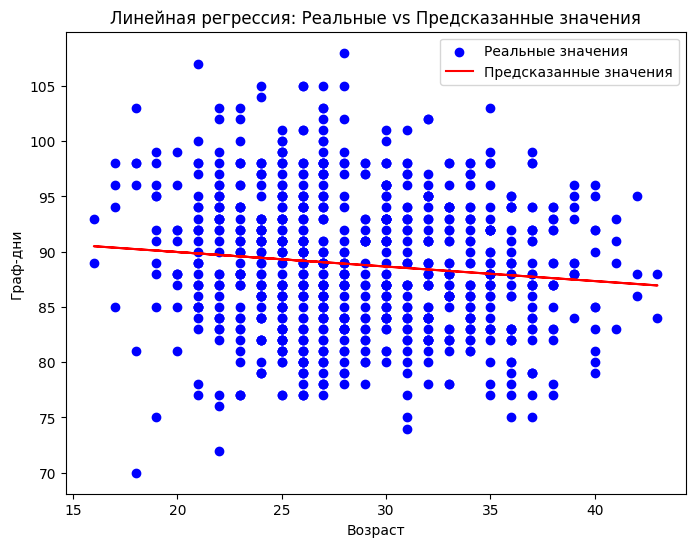

p-значение F-статистики: 0.001036429583193302
Уравнение регрессии значимо при a = 0,05


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['vozrast']]
y = df['gr-dni']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)

# Проверка размеров выборки
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train = sm.add_constant(X_train)


model = sm.OLS(y_train, X_train).fit()

print(model.summary())

import matplotlib.pyplot as plt


y_train_pred = model.predict(X_train)

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(X_train['vozrast'], y_train, color='blue', label='Реальные значения')
plt.plot(X_train['vozrast'], y_train_pred, color='red', label='Предсказанные значения')
plt.xlabel('Возраст')
plt.ylabel('Граф-дни')
plt.title('Линейная регрессия: Реальные vs Предсказанные значения')
plt.legend()
plt.show()

pvalue = model.f_pvalue
print(f'p-значение F-статистики: {pvalue}')

if pvalue < 0.05:
    print('Уравнение регрессии значимо при a = 0,05')
else:
    print('Уравнение регрессии незначимо при a = 0,05')


In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['ctr']]
y = df['gr-dni']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)

print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model1 = sm.OLS(y_train, X_train).fit()

print(model1.summary())

import matplotlib.pyplot as plt


y_train_pred = model1.predict(X_train)

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(X_train['ctr'], y_train, color='blue', label='Реальные значения')
plt.plot(X_train['ctr'], y_train_pred, color='red', label='Предсказанные значения')
plt.xlabel('Возраст')
plt.ylabel('Граф-дни')
plt.title('Линейная регрессия: Реальные vs Предсказанные значения')
plt.legend()
plt.show()

pvalue = model1.f_pvalue
print(f'p-значение F-статистики: {pvalue}')

if pvalue < 0.05:
    print('Уравнение регрессии значимо при a = 0,05')
else:
    print('Уравнение регрессии незначимо при a = 0,05')

NameError: name 'df' is not defined

Модель с "возрастом" показала себя гораздо хуже чем модель с ctr, что неудивительно учитывая значение коэфф корреляции

Проверим на переобучение модель с ctr

In [ ]:
from sklearn.metrics import mean_squared_error
# прогнозы на обучающих и тестовых выборках
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

#R²
R2_train = model1.rsquared
R2_test = 1 - (1-model1.rsquared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

#Вычисляем стандартные ошибки регрессии
Se_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
Se_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

#Вычисляем средние ошибки аппроксимации
A_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
A_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

#Выводим результаты
print(f'R² на обучающем наборе: {R2_train}')
print(f'R² на тестовом наборе: {R2_test}')
print(f'Стандартная ошибка регрессии на обучающем наборе: {Se_train}')
print(f'Стандартная ошибка регрессии на тестовом наборе: {Se_test}')
print(f'Средняя ошибка аппроксимации на обучающем наборе: {A_train}')
print(f'Средняя ошибка аппроксимации на тестовом наборе: {A_test}')

R² на обучающем наборе: 0.6790195715916394
R² на тестовом наборе: 0.6759183114137808
Стандартная ошибка регрессии на обучающем наборе: 3.543543905479473
Стандартная ошибка регрессии на тестовом наборе: 3.6453546775838745
Средняя ошибка аппроксимации на обучающем наборе: 3.046479198263253
Средняя ошибка аппроксимации на тестовом наборе: 3.2032219014140844


Не произошло переобучения. Показатели качества для обучающей выборки немного лучше, чем для тестовой выборки, но разница не слишком большая. Это означает, что модель хорошо обобщает данные и может быть использована для прогнозирования на новых данных.

Нелинейная модель с двумя переменныими

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = df[['ctr','vozrast']]
y = df['gr-dni']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)

poly = PolynomialFeatures(degree=5)

X_poly = poly.fit_transform(X_train[['ctr', 'vozrast']])

model = LinearRegression().fit(X_poly, y_train)

print('Коэффициенты модели:', model.coef_)


Коэффициенты модели: [ 0.00000000e+00  1.05250911e+02  2.13058554e+02 -1.72596440e+00
 -6.43249773e+00 -7.36714392e+00  1.55386874e-02  6.72419443e-02
  1.73195649e-01  1.21753792e-01 -8.81636592e-05 -2.07682165e-04
 -1.52389691e-03 -1.59358131e-03 -1.16564809e-03  2.55923693e-07
 -1.88382832e-07  4.37745091e-06  6.53965382e-06  6.41980976e-06
  4.74122813e-06]


In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_poly)

r2 = r2_score(y_train, y_pred)

print('R² для модели:', r2)


R² для модели: 0.7010650338454034


In [ ]:
#преобразование тестовых данных в полиномиальные признаки
X_test_poly = poly.transform(X_test[['ctr', 'vozrast']])

y_pred = model.predict(X_test_poly)
print('Предсказанные значения:', y_pred)

Предсказанные значения: [83.88611352 91.11286862 83.68279622 85.59227495 82.31453964 90.99628266
 82.99937368 87.57928133 79.30540247 92.29722574 81.52005771 88.56962355
 82.85502889 92.18472939 88.42145504 98.84414991 92.54610108 90.44999029
 94.22175466 91.57594329 86.02151088 88.56962355 94.66602711 90.78065044
 92.15649201 79.30540247 85.34119964 78.67593973 87.99749322 80.32604543
 81.63753217 86.2625503  90.26441483 97.61952141 84.69289826 90.15444203
 89.52504021 87.52077269 93.92368899 86.52584747 90.30723162 89.10575477
 90.69733572 90.02278988 81.22218814 79.86694667 81.94746153 88.54268366
 98.10470229 96.76185128 95.85407147 87.759461   91.29041011 96.76781837
 85.49095311 87.20603968 81.90546058 85.9767295  87.50014019 88.02355678
 95.66042946 85.52573122 84.16199596 78.91156336 79.65567045 91.49878564
 91.48444251 95.20048947 98.44653754 96.45283453 91.88321176 92.15649201
 89.70402305 92.10845723 90.30723162 83.27407365 95.20048947 85.15083521
 98.84414991 88.60542705 82

In [ ]:
from sklearn.metrics import mean_absolute_error

#Рассчитываем MAE
mae = mean_absolute_error(y_test, y_pred)

print('Средняя абсолютная ошибка:', mae)


Средняя абсолютная ошибка: 2.8818656114514787


То есть нелинейная модель в среднем может ошибиться в 2-3 дня, что является хорошим показателем

Вывод

Для прогнозирование можно взять как полиномиальную, так и простую парную линейную модель, но полиномиальная всё же будет оптимальным вариантов